In [25]:
import numpy as np
import pandas as pd
x=pd.read_csv('datasets/x.csv')

In [26]:
y=x['worldwide_gross']
x.drop('worldwide_gross', axis=1)

,production_budget,title_year,aspect_ratio,duration.1,budget,imdb_score,gross
0,425000000.0,2009.000000,1.780000,178.000000,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2002.130733,2.126976,108.577186,4.045539e+07,7.1,4.831933e+07
2,300000000.0,2007.000000,2.350000,169.000000,3.000000e+08,7.1,3.094042e+08
3,300000000.0,2015.000000,2.350000,148.000000,2.450000e+08,6.8,2.000742e+08
4,275000000.0,2012.000000,2.350000,164.000000,2.500000e+08,8.5,4.481306e+08
...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,7.000000e+03,7.0,4.247600e+05
4100,7000.0,2005.000000,2.126976,80.000000,7.000000e+03,6.3,7.007100e+04
4101,7000.0,2005.000000,2.126976,84.000000,3.250000e+03,7.8,4.831933e+07
4102,3967.0,2012.000000,2.350000,100.000000,4.045539e+07,6.3,1.044300e+04


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [28]:
print(len(x))
print(len(x_test))
print(len(x_train))

4104
1642
2462


In [29]:
#crear modelo R Lineal con Lasso, entrenar el modelo y ajustarlo cno FIT
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
#Vector de prediccion 
predicted= model.predict(x_test)


In [31]:
predicted

array([3.58912570e+07, 3.54156507e+06, 5.42071118e+07, ...,
       1.72522871e+07, 2.86995378e+08, 4.16362428e+07])

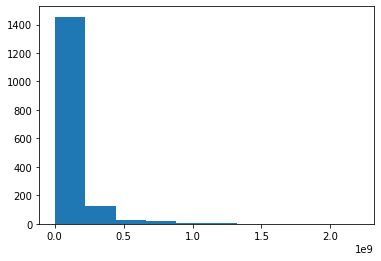

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(predicted);

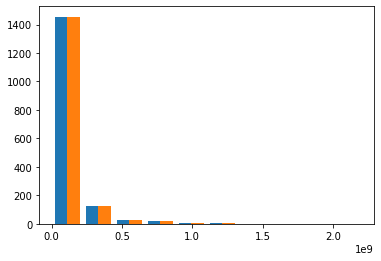

In [33]:
plt.hist([predicted,y_test]);

In [34]:
model.score(x_test,y_test)

1.0

In [35]:
residuals=y_test-predicted


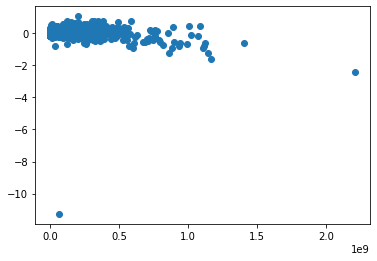

In [36]:
plt.scatter(y_test,residuals)

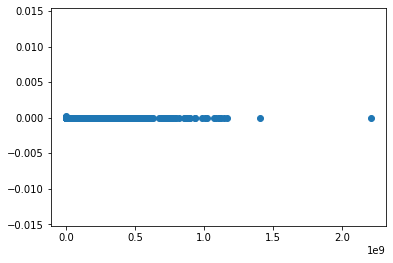

In [37]:
ap_residuals=np.abs(residuals)/y_test
plt.scatter(y_test,ap_residuals)

# Rendimiento del Modelo Features Feature Engineering